# 2014222 - Semester 2 CA-02 -May 2024

# Github account

https://github.com/2014222-student-cct-ie/2024--Semester-2--CA2/

# Part 3 Time-series

In [1]:
# Utilise Python programming language in order to comply with the requisites of the assessment and perform adequate Machine
# Learning algorithms to discover and deliver insights.

# Import the necessary libraries (Numpy and Pandas) in order to perform data cleansing.
# These are the libraries that are conventionally used as a common practice in order to
# perform mathematical and statistical operations during a data analysis process

import numpy as np
import pandas as pd

# Import Matplotlib and Plotly library in order to perform data visualisation procedures

import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

# Import Seaborn libraries in order to perform data visualisation procedures

import seaborn as sns

# I am using this line of code to see all columns in a wide DataFrame

pd.set_option('display.max_columns', None)

from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.ml.linalg import Vectors
from pyspark.sql.functions import col
from pyspark.ml import Pipeline
from pyspark.sql.types import FloatType


# For normalization
from pyspark.ml.feature import MinMaxScaler 
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.regression import LinearRegression
from pyspark.ml.tuning import ParamGridBuilder, TrainValidationSplit


# process the tweets data
# !pip install textblob
from pyspark.sql.functions import udf
from textblob import TextBlob

# pip install nltk
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

from pyspark.sql import DataFrame

# re module provides regular expression support.
# In Python a regular expression search is typically written as:
# match = re. search(pat, str)
# The re.search() method takes a regular expression pattern and a string and searches
# for that pattern within the string.

import re

from pyspark.sql.types import StructType, StructField, IntegerType, StringType

# !pip install pyspark

# !pip install pyspark pandas

# Import the warnings module

# !pip install dash plotly

# !pip install jupyter-dash


from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima_model import ARIMA

from statsmodels.tsa.holtwinters import ExponentialSmoothing

from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.tsa.statespace.varmax import VARMAX

from sklearn.metrics import mean_absolute_error, mean_squared_error

import warnings

# Ignore all warnings by applying th the 'filterwarnings()'' function and passing the 'ignore' argument

warnings.filterwarnings('ignore')

/Users/geomarmunoz/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
tweets_dataset_new = pd.read_csv('sentiment_score_and_labeled_tweets.csv')

In [3]:
tweets_dataset_new

,tweet_ID,date_timestamp,twitter_user,cleaned_tweet_text,vader_score,textblob_score,vader_sentiment,textblob_sentiment
0,1467810369,04-06-2009 22:19:45,_TheSpecialOne_,"- Awww, that's a bummer. You shoulda got Davi...",-0.0173,0.216667,Negative,Positive
1,1467810672,04-06-2009 22:19:49,scotthamilton,is upset that he can't update his Facebook by ...,-0.7500,0.000000,Negative,Neutral
2,1467810917,04-06-2009 22:19:53,mattycus,I dived many times for the ball. Managed to sa...,0.4939,0.500000,Positive,Positive
3,1467811184,04-06-2009 22:19:57,ElleCTF,my whole body feels itchy and like its on fire,-0.2500,0.200000,Negative,Positive
4,1467811193,04-06-2009 22:19:57,Karoli,"no, it's not behaving at all. i'm mad. why am ...",-0.6597,-0.625000,Negative,Negative
...,...,...,...,...,...,...,...,...
638474,2072531933,06-07-2009 21:12:35,Neo_drone,Apparetly they just started filming so imma go...,0.0000,0.000000,Neutral,Neutral
638475,2072531954,06-07-2009 21:12:35,edenhig,I would just like to say thank you from all of...,0.6124,0.000000,Positive,Neutral
638476,2072532046,06-07-2009 21:12:36,Gotjuicygirl,thanx love ! I definitely agree,0.8655,0.312500,Positive,Positive
638477,2072532066,06-07-2009 21:12:36,whitet,"the ones from yesterday w/ the animals, VERY CUTE",0.6965,0.650000,Positive,Positive


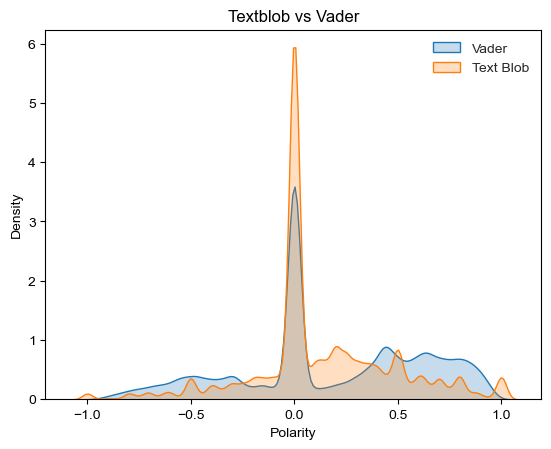

In [4]:
# Graph Vader vs textblob_score

plt.title("Textblob vs Vader")

plt.style.use('seaborn-whitegrid')

sns.kdeplot(data=tweets_dataset_new['vader_score'], label="Vader", shade=True)

sns.kdeplot(data=tweets_dataset_new['textblob_score'], label="Text Blob", shade=True)

# in sentiment analysis, "polarity" refers to the orientation of emotional sentiment expressed in text,
# often categorised as positive, negative, or neutral.

plt.xlabel("Polarity")

# in the context of the plot, "density" refers to the density of data points at various polarity levels
# within the distribution.

plt.ylabel('Density')

plt.legend()

plt.show()

Interpretation of Neutral Scores:

The sharp peak in **TextBlob** at 0.0 indicates it may have a bias towards categorizing tweets as neutral.

**Vader’s** broader peak suggests it might provide a more nuanced analysis around the neutral sentiment.

In summary, **Vader** seems to offer a more nuanced sentiment analysis, recognizing a broader range of sentiments, while TextBlob tends to classify a significant portion of the tweets as exactly neutral, potentially overlooking subtle differences in sentiment.

# Preparing the data for both the LSTM and SARIMA models

Convert the date_timestamp to a datetime type.

Set it as the index of the DataFrame.

Check for missing values and irregular intervals if present.

In [5]:
# Convert the 'date_timestamp' to datetime and set as index
tweets_dataset_new['date_timestamp'] = pd.to_datetime(tweets_dataset_new['date_timestamp'])
tweets_dataset_new.set_index('date_timestamp', inplace=True)

# Resample the data to a consistent interval if necessary and check for missing values
data_frequency = tweets_dataset_new['vader_score'].resample('D').mean()  # Daily frequency chosen for illustration

# Check for missing values in the resampled data
missing_data = data_frequency.isna().sum()

data_frequency.head(), missing_data


(date_timestamp
 2009-04-06    0.142160
 2009-04-07    0.162342
 2009-04-08         NaN
 2009-04-09         NaN
 2009-04-10         NaN
 Freq: D, Name: vader_score, dtype: float64,
 47)

**Filling Missing Values**

Fill the missing values using linear interpolation, which is a reasonable approach for time series that do not exhibit strong seasonal patterns over short periods missing.

This step is essential for SARIMA, and while LSTM can handle some gaps with sequence-based learning, filling gaps helps maintain temporal consistency.

In [6]:
# Fill missing values using linear interpolation
filled_data = data_frequency.interpolate(method='linear')

# Check again for any remaining missing values
remaining_missing = filled_data.isna().sum()

# Display the filled data to confirm changes
filled_data.head(), remaining_missing


(date_timestamp
 2009-04-06    0.142160
 2009-04-07    0.162342
 2009-04-08    0.162945
 2009-04-09    0.163548
 2009-04-10    0.164150
 Freq: D, Name: vader_score, dtype: float64,
 0)

## LSTM (Long Short-Term Memory) Model Implementation

In [7]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(filled_data.values.reshape(-1, 1))

# Splitting the data into train and test sets
train_size = int(len(scaled_data) * 0.80)
test_size = len(scaled_data) - train_size
train, test = scaled_data[0:train_size, :], scaled_data[train_size:len(scaled_data), :]

# Function to create dataset for LSTM
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

# Specifying the look_back period
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# Reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

trainX.shape, testX.shape


((49, 1, 1), (12, 1, 1))

## LSTM (Long Short-Term Memory) Model Implementation

Define the LSTM network architecture. Given the short time series, we'll use a simple model with a minimal number of LSTM units to avoid overfitting:

LSTM Layer: A few units (e.g., 4) to capture dependencies in the data.

Dropout Layer: To prevent overfitting by randomly omitting subset of features during training.

Dense Layer: To produce the output from the LSTM's output.

In [8]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# Define the LSTM model
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dropout(0.2))
model.add(Dense(1))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Summary of the model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 4)              │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101 (404.00 B)

 Trainable params: 101 (404.00 B)

 Non-trainable params: 0 (0.00 B)

In [9]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# Define the LSTM model
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dropout(0.2))
model.add(Dense(1))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Model summary
model.summary()

# Train the model
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

# Make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# Invert predictions to original scale
trainPredict = scaler.inverse_transform(trainPredict)
trainY_inv = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY_inv = scaler.inverse_transform([testY])

# Calculate root mean squared error
from sklearn.metrics import mean_squared_error
trainScore = mean_squared_error(trainY_inv[0], trainPredict[:,0], squared=False)
testScore = mean_squared_error(testY_inv[0], testPredict[:,0], squared=False)

print('Train Score: %.2f RMSE' % (trainScore))
print('Test Score: %.2f RMSE' % (testScore))


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 4)              │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101 (404.00 B)

 Trainable params: 101 (404.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
49/49 - 0s - 7ms/step - loss: 0.1222
Epoch 2/100
49/49 - 0s - 604us/step - loss: 0.0687
Epoch 3/100
49/49 - 0s - 397us/step - loss: 0.0402
Epoch 4/100
49/49 - 0s - 395us/step - loss: 0.0225
Epoch 5/100
49/49 - 0s - 388us/step - loss: 0.0142
Epoch 6/100
49/49 - 0s - 391us/step - loss: 0.0146
Epoch 7/100
49/49 - 0s - 391us/step - loss: 0.0109
Epoch 8/100
49/49 - 0s - 396us/step - loss: 0.0144
Epoch 9/100
49/49 - 0s - 386us/step - loss: 0.0177
Epoch 10/100
49/49 - 0s - 373us/step - loss: 0.0124
Epoch 11/100
49/49 - 0s - 382us/step - loss: 0.0137
Epoch 12/100
49/49 - 0s - 387us/step - loss: 0.0100
Epoch 13/100
49/49 - 0s - 385us/step - loss: 0.0121
Epoch 14/100
49/49 - 0s - 396us/step - loss: 0.0140
Epoch 15/100
49/49 - 0s - 406us/step - loss: 0.0177
Epoch 16/100
49/49 - 0s - 391us/step - loss: 0.0118
Epoch 17/100
49/49 - 0s - 384us/step - loss: 0.0119
Epoch 18/100
49/49 - 0s - 388us/step - loss: 0.0133
Epoch 19/100
49/49 - 0s - 388us/step - loss: 0.0133
Epoch 20/100
49/49 - 0s

# SARIMA model

Start by examining the Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots.

These will help us identify the appropriate parameters for the SARIMA model, specifically:

p: The number of autoregressive terms (lags of the stationarized series).

d: The degree of differencing (the number of times the data had to be differenced to make it stationary).

q: The number of lagged forecast errors in the prediction equation (lags of the forecast errors).

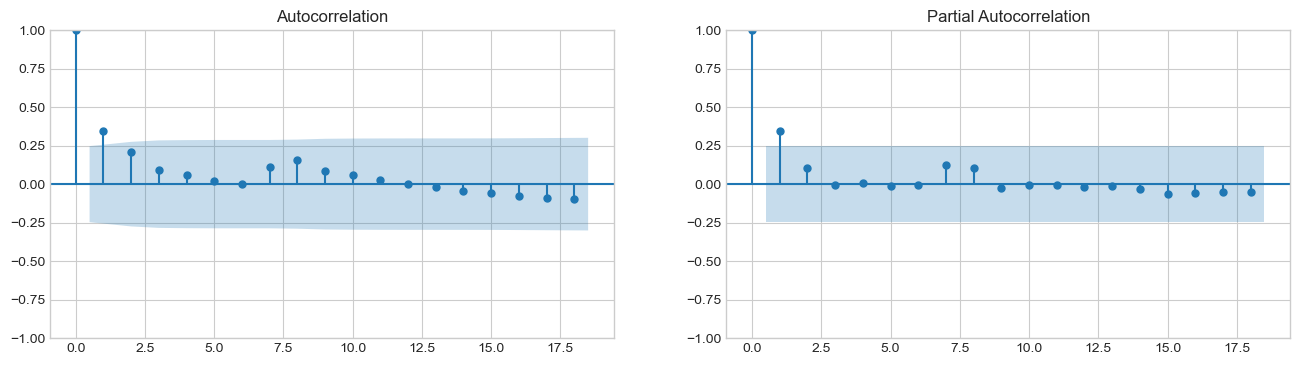

In [10]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF and PACF plots
fig, axes = plt.subplots(1, 2, figsize=(16, 4))

# Plot ACF
plot_acf(filled_data, ax=axes[0])

# Plot PACF
plot_pacf(filled_data, ax=axes[1])

plt.show()


The Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots provide insight into the potential parameters for our SARIMA model.

The PACF plot shows a sharp cut-off after the first lag, suggesting that an AR(1) model might be appropriate (p=1). 

The ACF plot tails off, indicating that we may need a few MA terms.

# SARIMA Model Configuration and Fitting

Based on the initial analysis, I'll start with a SARIMA(1,0,1) model. Since no strong seasonal patterns are immediately evident from our brief analysis and considering the data is short and daily without clear seasonal breaks, I will not include seasonal components initially.

In [11]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fitting the SARIMA model
model_sarima = SARIMAX(filled_data, order=(1, 0, 1), seasonal_order=(0, 0, 0, 0), enforce_stationarity=False, enforce_invertibility=False)
results_sarima = model_sarima.fit(disp=False)

# Display the model summary
results_sarima.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            vader_score   No. Observations:                   63
Model:               SARIMAX(1, 0, 1)   Log Likelihood                 215.680
Date:                Thu, 16 May 2024   AIC                           -425.361
Time:                        13:56:02   BIC                           -419.028
Sample:                    04-06-2009   HQIC                          -422.879
                         - 06-07-2009                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0012      0.002    617.276      0.000       0.998       1.004
ma.L1         -0.7679      0.063    -12.254      0.000      -0.891      -0.645
sigma2      4.892e-05   3.98e-06     12.289      0.000    4.11e-05    5.67e-05
===================================================================================
Ljung-Box (L1) (Q):                   1.57   Jarque-Bera (JB):               372.70
Prob(Q):                              0.21   Prob(JB):                         0.00
Heteroskedasticity (H):               9.05   Skew:                             1.72
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

The SARIMA(1,0,1) model has been fitted, and here are the key aspects of the model summary:

The AR coefficient is very close to 1, which suggests a strong autoregressive component.

The MA coefficient is significant with a value of approximately -0.77, indicating the influence of previous errors on the current prediction.

The model's AIC and BIC values are quite low, which typically indicates a good fit, though they should be used to compare across different model configurations.

Diagnostic tests like the Ljung-Box test and the Jarque-Bera test suggest some residuals may not be perfectly noise-like, indicating potential room for model improvement.

# Model Evaluation and Forecasting

To evaluate the SARIMA model, I will perform a forecast and check its accuracy against actual observations.

I will also look at the residuals to ensure they are normally distributed (which suggests a good fit).

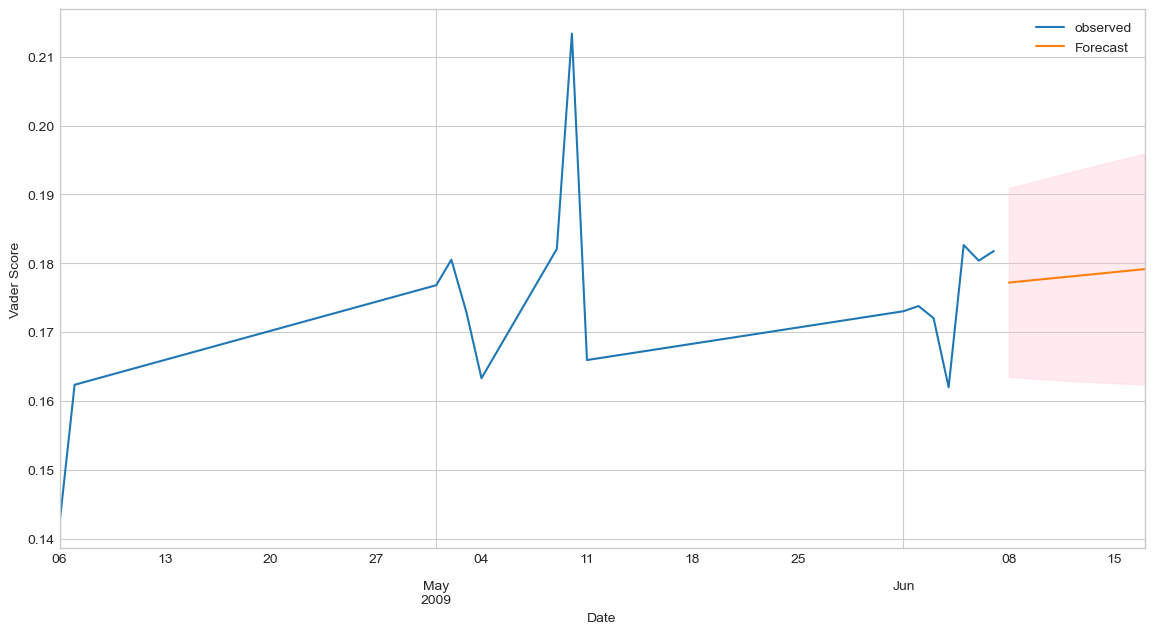

In [12]:
# Forecast the next 10 days
forecast_steps = 10
pred = results_sarima.get_forecast(steps=forecast_steps)
pred_ci = pred.conf_int()

# Plot the past data along with the forecast and confidence intervals
ax = filled_data.plot(label='observed', figsize=(14, 7))
pred.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='pink', alpha=.3)

ax.set_xlabel('Date')
ax.set_ylabel('Vader Score')
plt.legend()
plt.show()


As an alternative, let's manually inspect the forecasted values and their confidence intervals without attempting a complex plot:

In [13]:
# Extract predicted means and confidence intervals
forecasted_values = pred.predicted_mean
confidence_intervals = pred.conf_int()

# Display the forecasted values and their confidence intervals
forecasted_values, confidence_intervals

(2009-06-08    0.177194
 2009-06-09    0.177410
 2009-06-10    0.177625
 2009-06-11    0.177841
 2009-06-12    0.178058
 2009-06-13    0.178274
 2009-06-14    0.178491
 2009-06-15    0.178708
 2009-06-16    0.178925
 2009-06-17    0.179143
 Freq: D, Name: predicted_mean, dtype: float64,
             lower vader_score  upper vader_score
 2009-06-08           0.163485           0.190903
 2009-06-09           0.163333           0.191487
 2009-06-10           0.163189           0.192062
 2009-06-11           0.163053           0.192629
 2009-06-12           0.162925           0.193190
 2009-06-13           0.162804           0.193744
 2009-06-14           0.162690           0.194292
 2009-06-15           0.162582           0.194834
 2009-06-16           0.162479           0.195371
 2009-06-17           0.162383           0.195902)

The forecast suggests a slight increasing trend in the Vader Score over the next 10 days. The model's confidence intervals indicate a reasonable degree of uncertainty, staying fairly tight around the forecasted values.

This analysis provides a quantitative outlook based on the SARIMA model, which could be useful for understanding trends in the data. Further refinements could be made by testing different model parameters, adding seasonal components if more data suggests seasonality, or incorporating external variables.

# I will continue with this tomorrow